# DATA FRÅN 20 MARS  

In [39]:
# Import packages
import pandas as pd
import numpy as np

# Plotting tools
import plotly.express as px
import matplotlib.pyplot as plt

#
import os

## Import Data

In [40]:
import fnmatch
import os

files = os.listdir('CSV-files\Mars20')

df_test=pd.DataFrame()
for file in files:
    #if fnmatch.fnmatch(file, '*.csv'):
    if not file.lower().endswith('.csv'):
        pass
    else:
        df = pd.read_csv('CSV-files\Mars20'+'\\'+file)
        df_test = pd.concat([df_test, df]) 


df_test = df_test.pivot(index = 'Timestamp', columns = 'Channel Name', values = 'Value') 
df_test.index  = pd.to_datetime(df_test.index).tz_localize('Europe/Stockholm')

# Interpolate to fill in NaN-values
df_test=df_test.interpolate(method='time')
df_test = df_test[1:]
df_broad = df_test.resample('min').mean()


## Visualize Data

Let us only care about periods when we're delivering to the DH-grid

In [41]:
fig = px.line(df_broad, x=df_broad.index, y=['FJV_P2_ONOFF','r_shading'],
                title="")
fig.show()

# Filter to only include when delivering to DH-grid
df_broad = df_broad[df_broad['FJV_P2_ONOFF']>0]


### Temperatures
#### GT3 

In [42]:
df_broad['GT3_MEAN']=df_broad[['SVS-GT3A_TEMPERATURE','SVS-GT3B_TEMPERATURE']].mean(axis=1)
df_broad['GT3_DIFF']=abs(df_broad['SVS-GT3A_TEMPERATURE']-df_broad['SVS-GT3B_TEMPERATURE'])

fig = px.line(df_broad, x=df_broad.index, y=['GT3_DIFF','GT3_MEAN','SVS-GT3A_TEMPERATURE','SVS-GT3B_TEMPERATURE'],
                title="GT3")
fig.show()

print('Mean: ',df_broad['GT3_MEAN'].mean(axis=0), 'Mean diff in GT3: ', df_broad['GT3_DIFF'].mean())

Mean:  65.96811239756227 Mean diff in GT3:  0.15646914480782043


#### GT1

In [43]:
df_broad['GT1_MIN'] = df_broad[['SVS-GT1:1_TEMPERATURE', 'SVS-GT1:2_TEMPERATURE',
       'SVS-GT1:3_TEMPERATURE', 'SVS-GT1:4_TEMPERATURE',
       'SVS-GT1:5_TEMPERATURE', 'SVS-GT1:6_TEMPERATURE',
       'SVS-GT1:7_TEMPERATURE', 'SVS-GT1:8_TEMPERATURE']].min(axis=1)
df_broad['GT1_MAX'] = df_broad[['SVS-GT1:1_TEMPERATURE', 'SVS-GT1:2_TEMPERATURE',
       'SVS-GT1:3_TEMPERATURE', 'SVS-GT1:4_TEMPERATURE',
       'SVS-GT1:5_TEMPERATURE', 'SVS-GT1:6_TEMPERATURE',
       'SVS-GT1:7_TEMPERATURE', 'SVS-GT1:8_TEMPERATURE']].max(axis=1)
df_broad['GT1_MEAN'] = df_broad[['SVS-GT1:1_TEMPERATURE', 'SVS-GT1:2_TEMPERATURE',
       'SVS-GT1:3_TEMPERATURE', 'SVS-GT1:4_TEMPERATURE',
       'SVS-GT1:5_TEMPERATURE', 'SVS-GT1:6_TEMPERATURE',
       'SVS-GT1:7_TEMPERATURE', 'SVS-GT1:8_TEMPERATURE']].mean(axis=1)

df_broad['GT1_DIFF'] = df_broad['GT1_MAX'] - df_broad['GT1_MIN']

fig = px.line(df_broad, x=df_broad.index, y=['GT1_MAX', 'GT1_MIN','GT1_DIFF','GT1_MEAN'],
              labels={"value":"Temperature",},
                title="GT1")
fig.show()

#### Determine value of $T_m$ 

In [44]:
df_broad['Tm'] = df_broad[['GT1_MEAN','GT3_MEAN']].mean(axis=1)
df_broad['GT1-GT3'] = df_broad['GT1_MEAN'] - df_broad['GT3_MEAN']

fig = px.line(df_broad, x=df_broad.index, y=['SVS-GT15_TEMPERATURE','GT3_MEAN','GT1_MEAN','Tm','GT3_MEAN','GT1-GT3'],
             title='Temperatures',labels={'value':'Temperature'})
fig.show()

### Irradiance

In [45]:
fig = px.line(df_broad, x=df_broad.index, y=['SPN1_BEAM_RADIATION', 'SPN1_DIFFUSE_IRRADIANCE',
       'SPN1_GLOBAL_IRRADIANCE', 'SPN1_TRUE_DNI','SVS-GIRD1_IRRADIANCE','SVS-GIRD2_IRRADIANCE','SVS-GIRG1A_IRRADIANCE',
       'SVS-GIRG1B_IRRADIANCE', 'SVS-GIRG2A_IRRADIANCE', 'SVS-GIRG2B_IRRADIANCE','SVS_BEAM_RADIATION_1', 'SVS_BEAM_RADIATION_2',
       'SVS_DIFFUSE_RADIATION_1', 'SVS_DIFFUSE_RADIATION_2', 'SVS_HIGHEST_DNI'],
                title="Irradiance")
fig.show()



In [46]:
max_DNI = df_broad[['SVS_BEAM_RADIATION_1','SVS_BEAM_RADIATION_2','SPN1_BEAM_RADIATION']].max(axis=1)
df_broad['SVS_DIFFUSE_MAX'] = df_broad[['SPN1_DIFFUSE_IRRADIANCE','SVS_DIFFUSE_RADIATION_1', 'SVS_DIFFUSE_RADIATION_2']].max(axis=1)
df_broad['SVS_BEAM_MAX'] = max_DNI

fig = px.line(df_broad, x=df_broad.index, y=['SPN1_BEAM_RADIATION','SVS_BEAM_RADIATION_1', 'SVS_BEAM_RADIATION_2','SVS_BEAM_MAX','SVS_DIFFUSE_MAX'],
                title="Beam Radiation",labels={'value':'Irradiance'})
fig.show()

Between 8:51:56 and 17:28:56 is the DH-grid pump turned on, meaning heat is delivered to the network throughout this period. 

Vi ser också lite av trögheten i systemet. Lång tid innan pumpen slås på. 

### Tracking Angles

In [47]:
fig = px.line(df_broad, x=df_broad.index, y=['col_ang0', 'col_ang1', 'col_ang10', 'col_ang11','col_ang12', 
                                             'col_ang13', 'col_ang14', 'col_ang15','col_ang2','col_ang3', 
                                             'col_ang4', 'col_ang5', 'col_ang6', 'col_ang7', 'col_ang8','col_ang9'],
                title="Tracking Angles")
fig.show()


df_broad['col_ang_STD'] = df_broad[['col_ang0', 'col_ang1', 'col_ang10', 'col_ang11','col_ang12', 
                                             'col_ang13', 'col_ang14', 'col_ang15','col_ang2','col_ang3', 
                                             'col_ang4', 'col_ang5', 'col_ang6', 'col_ang7', 'col_ang8','col_ang9']].std(axis=1)
df_broad['col_ang_MEAN'] = df_broad[['col_ang0', 'col_ang1', 'col_ang10', 'col_ang11','col_ang12', 
                                             'col_ang13', 'col_ang14', 'col_ang15','col_ang2','col_ang3', 
                                             'col_ang4', 'col_ang5', 'col_ang6', 'col_ang7', 'col_ang8','col_ang9']].mean(axis=1)


In [48]:
df_broad.columns

Index(['FJV-GF2_FLOW', 'FJV_P2_ONOFF', 'FJV_P2_control', 'IAM_factor',
       'SPN1_BEAM_RADIATION', 'SPN1_DIFFUSE_IRRADIANCE',
       'SPN1_GLOBAL_IRRADIANCE', 'SPN1_TRUE_DNI', 'SVS-GF1_FLOW',
       'SVS-GIRD1_IRRADIANCE', 'SVS-GIRD2_IRRADIANCE', 'SVS-GIRG1A_IRRADIANCE',
       'SVS-GIRG1B_IRRADIANCE', 'SVS-GIRG2A_IRRADIANCE',
       'SVS-GIRG2B_IRRADIANCE', 'SVS-GT15_TEMPERATURE',
       'SVS-GT1:1_TEMPERATURE', 'SVS-GT1:2_TEMPERATURE',
       'SVS-GT1:3_TEMPERATURE', 'SVS-GT1:4_TEMPERATURE',
       'SVS-GT1:5_TEMPERATURE', 'SVS-GT1:6_TEMPERATURE',
       'SVS-GT1:7_TEMPERATURE', 'SVS-GT1:8_TEMPERATURE',
       'SVS-GT2A_TEMPERATURE', 'SVS-GT2B_TEMPERATURE', 'SVS-GT3A_TEMPERATURE',
       'SVS-GT3B_TEMPERATURE', 'SVS_BEAM_RADIATION_1', 'SVS_BEAM_RADIATION_2',
       'SVS_DIFFUSE_RADIATION_1', 'SVS_DIFFUSE_RADIATION_2',
       'SVS_ENERGY_GT1GT3_TOTAL', 'SVS_ENERGY_GT1GT3_TOTAL_PER_SQM',
       'SVS_HIGHEST_DNI', 'SVS_HIGHEST_DNI_shaded_w_IAM', 'SVS_MEAN_DNI',
       'SVS_POWER_GT1GT

In [49]:
diff = np.zeros((len(df_broad),16))

cols = ['col_ang0', 'col_ang1','col_ang2','col_ang3', 'col_ang4', 'col_ang5', 'col_ang6', 'col_ang7', 
        'col_ang8','col_ang9', 'col_ang10', 'col_ang11','col_ang12','col_ang13', 'col_ang14', 'col_ang15']

for i in range(len(cols)):
    col = cols[i]
    diff[:,i] = np.array(df_broad[col]-(df_broad['phi_angle']))
    print('Mean tracking error (tracking - phi)for {0} is {1}'.format(col,diff[:,i].mean()))
    
fig = px.line(df_broad, x=df_broad.index, y=[diff[:,i] for i in range(10)],
    #diff[:,0],diff[:,1]],
              labels={'value':'Tracking error'},
                title="Tracking Errors (tracking - phi)")
            
fig.show()

Mean tracking error (tracking - phi)for col_ang0 is -0.14806797243336353
Mean tracking error (tracking - phi)for col_ang1 is -0.11531570353931303
Mean tracking error (tracking - phi)for col_ang2 is -0.12232752817047277
Mean tracking error (tracking - phi)for col_ang3 is -0.14117612832807117
Mean tracking error (tracking - phi)for col_ang4 is -0.14537975355491015
Mean tracking error (tracking - phi)for col_ang5 is -0.11609196987361366
Mean tracking error (tracking - phi)for col_ang6 is -0.11652715036232691
Mean tracking error (tracking - phi)for col_ang7 is -0.13088118679463837
Mean tracking error (tracking - phi)for col_ang8 is -0.11422555950463847
Mean tracking error (tracking - phi)for col_ang9 is -0.11139460191392374
Mean tracking error (tracking - phi)for col_ang10 is -0.11816652773335029
Mean tracking error (tracking - phi)for col_ang11 is -0.14923125139777677
Mean tracking error (tracking - phi)for col_ang12 is -0.1182688003298589
Mean tracking error (tracking - phi)for col_ang13

## Look at Pvlib

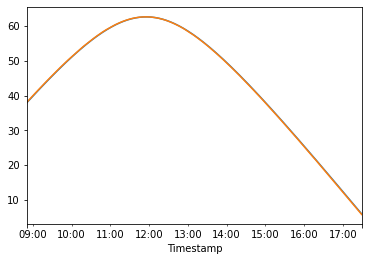

In [50]:
from pvlib import solarposition, tracking
import pandas as pd
import matplotlib.pyplot as plt

tz = 'Europe/Stockholm'

lat, lon = 62.6329, 17.938 # degrees

#times = df_astrasys.index
times = df_broad.index

solpos = solarposition.get_solarposition(times, lat, lon)

truetracking_angles = tracking.singleaxis(
    apparent_zenith=solpos['apparent_zenith'],
    apparent_azimuth=solpos['azimuth'],
    axis_tilt=0,
    axis_azimuth=180,
    max_angle=90,
    backtrack=False,  # for true-tracking
    gcr=0.5)  # irrelevant for true-tracking

# truetracking_angles['aoi'] is the angle of incidence
truetracking_angles['aoi'].plot()
df_broad['theta_angle'].plot()

df_broad['aoi'] = truetracking_angles['aoi']

# gives the same as theta_angle in dashboard

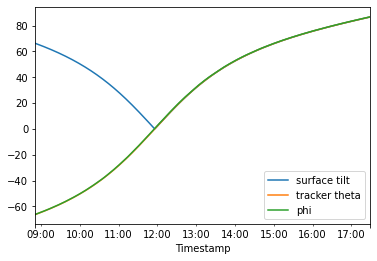

In [51]:
truetracking_angles['surface_tilt'].plot(label='surface tilt')
truetracking_angles['tracker_theta'].plot(label='tracker theta')
df_broad['phi_angle'].plot(label='phi')

plt.legend()

# tracker theta is the same as phi_angle

## Jonathans Equation for r_shading

Text(0, 0.5, 'r_shading')

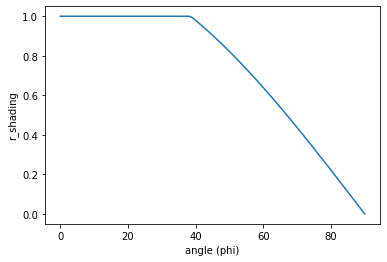

In [68]:
# For shading on HORIZONTAL SURFACE
b_out =  1.095 # m. Width of collector
Lcc = 1.4 # CC distance b/w collectors
import numpy as np
phi = np.arange(0,91)* np.pi/180
#phi = (90-phi1) *np.pi/180

r_shading = (1/b_out)*(b_out/2 + (-b_out/2*np.cos(phi)+Lcc)*np.cos(phi) -(b_out/2*np.sin(phi))*np.sin(phi))
r_shading[r_shading > 1] = 1

plt.plot((phi/(np.pi/180)),r_shading)
plt.xlabel('angle (phi)')
plt.ylabel('r_shading')

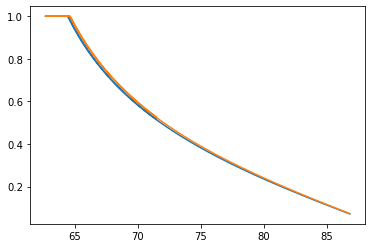

In [53]:
# For shading on HORIZONTAL SURFACE
b_out =  1.095 # m. Width of collector
Lcc = 1.4 # CC distance b/w collectors

phi = np.deg2rad(df_broad['phi_angle'])


r_shading = (1/b_out)*(b_out/2 + (-b_out/2*np.cos(phi)+Lcc)*np.cos(phi) -(b_out/2*np.sin(phi))*np.sin(phi))
r_shading[r_shading > 1] = 1

plt.plot(df_broad['zenith_angle'],r_shading)
plt.plot(df_broad['zenith_angle'],df_broad['r_shading'])

Implenteringen av Jonathans shading equation stämmer bra med den fämtad i Dashboarden. 

## Implementation of QDT-model
As given by the QDT-model

In [54]:
Angles = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90] #zenith angles
IAM_df = pd.DataFrame({#'Angle':Angles,
                       'QDT-method':[1.00, 0.99, 0.98, 0.96, 0.90, 0.80, 0.64,
           0.43, 0.21, 0.00],
                      'SS-method':[1.00, 0.99, 0.99, 0.98, 0.96, 0.91, 0.77, 0.53, 
          0.18, 0.00]}, index = Angles)

IAM_df.index.names = ['Angle']

IAM_df.T

Angle,0,10,20,30,40,50,60,70,80,90
QDT-method,1.0,0.99,0.98,0.96,0.90,0.80,0.64,0.43,0.21,0.0
SS-method,1.0,0.99,0.99,0.98,0.96,0.91,0.77,0.53,0.18,0.0


In [55]:
def IAM_qdt(angle,method):
    """ Input: angle, method
        Output: IAM for given angle
    """
    Angles = IAM_df.index
    IAM = IAM_df[method]
    if angle < 90:
        k = np.polyfit(Angles,IAM,5)
        p = np.poly1d(k)
    else:
        p = lambda angle: 0  
    return p(angle)

def dTdt(df):
    diff = np.zeros(len(df-1))
    for i in range(1,len(df)):
        dT = float(df['Tm'][i]-df['Tm'][i-1])
        dt = (df.index[i] - df.index[i-1])
        dt = np.timedelta64(dt,'s').astype(int)
        diff[i-1] = dT/dt
    #plt.plot(df.index,dTdt)
    return  diff

def Q_sqm(df):
    #Def. global variables
    a1,a2,a3,a4,a5,a6,a7,a8, Kd,etab = 0.73,0.000,0.000,0.00, 1483, 0.000, 0.00, 0.00, 0.12,0.697

    #Ag = 6.04 % For I collector
    Ag = 1058 # for entire collector field

    # Kb = 'SVS_HIGHEST_DNI'
    #Kb = np.array([IAM_qdt(angle) for angle in truetracking_angles['aoi']]) 
    #Kb = df['IAM_factor']
    Gb = df['SVS_HIGHEST_DNI_shaded_w_IAM'] # shading and IAM accounted for
    Gd = np.array(df['SVS_DIFFUSE_MAX']) 
    
    Q = ((etab*Gb)+(etab*Gd*Kd)-(a1*(df['Tm']-df['SVS-GT15_TEMPERATURE']))
         -(a2*(df['Tm']-df['SVS-GT15_TEMPERATURE'])**2)+ a5*dTdt(df))
    return np.clip(Q,a_min=0,a_max=None)



def my_Q_sqm(df):
    max_DNI = df[['SVS_BEAM_RADIATION_1','SVS_BEAM_RADIATION_2','SPN1_BEAM_RADIATION']].max(axis=1)
    
    #Def. global variables
    a1,a2,a3,a4,a5,a6,a7,a8, Kd,etab = 0.73,0.000,0.000,0.00, 1483, 0.000, 0.00, 0.00, 0.12,0.697
    #Ag = 6.04 % For 1 collector
    Ag = 1058 # for entire collector field

    #Kb = np.array([IAM_qdt(angle,method='QDT-method') for angle in df['aoi']]) 
    Kb = df['IAM_factor']
    Gb = max_DNI*df['r_shading'] # shading accounted for
    Gd = np.array(df['SVS_DIFFUSE_MAX']) #'SPN1_DIFFUSE_IRRADIANCE'
    
    Q = ((etab*Gb*Kb)+(etab*Kd*Gd)-(a1*(df['Tm']-df['SVS-GT15_TEMPERATURE']))
         -(a2*(df['Tm']-df['SVS-GT15_TEMPERATURE'])**2)+ a5*dTdt(df))
    return np.clip(Q,a_min=0,a_max=None)

my_q_sqm = my_Q_sqm(df_broad)
q_sqm = Q_sqm(df_broad)

In [56]:
df_broad['My_QDT_Power']= my_Q_sqm(df_broad)

fig = px.line(df_broad, x=df_broad.index, y=['SVS_POWER_GT1GT3', 'SVS_QDT_calculated_power_per_m2', 
                                             'SVS_QDT_calculated_total_power',q_sqm,'My_QDT_Power'],
              labels={'value':'Power'},
                title="Extracted Power")
fig.show()

Dashboards 'SVS_POWER_GT1GT3_PER_SQM' inte rimlig. Har räknat 
power/square meters as $Q/A^2$

Vi ser en hög peak i uppmätt effekt vid 10 på förmiddagen, där modell och uppmätt effekt inte stämmer särskillt bra överens. Övriga tider ser de ut att följa samma kurva. Från kurvan nedan får vi att detta sammanfaller med peakar i flödet, vilket kommer påverka uppmätt effekt ($Q = \dot{m} \cdot c_f \Delta T$). Vi ser också att flödet pendlar en hel del även när ett relativt stabilt läge har uppnåts. 

In [58]:
df_broad['My_QDT_Power']= my_Q_sqm(df_broad)

fig = px.line(df_broad, x=df_broad.index, y=['SVS-GF1_FLOW'],
              labels={'value':'Flow [m3/h]'},
                title="Flow")
fig.show()

[  1.0472673  -12.75873413]


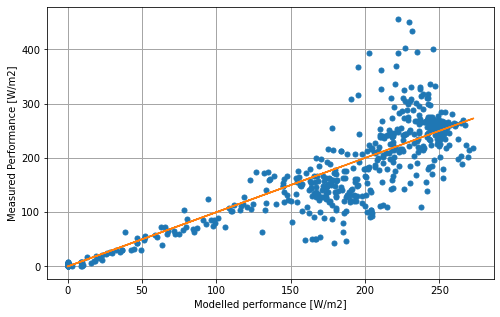

In [62]:
k = np.polyfit(df_broad['My_QDT_Power'],df_broad['SVS_POWER_GT1GT3'],1)
p = np.poly1d(k)
p = lambda a: a
print(k)

# Create figure and axis objects
fig, ax = plt.subplots(figsize=(8, 5))

# Create a scatterplot
ax.plot(
    df_broad['My_QDT_Power'],
    df_broad['SVS_POWER_GT1GT3'],
    marker="o",
    linestyle="",
    markersize=5,
)

#ax.plot(df_m['My_QDT_Power'],p(df_m['My_QDT_Power']))
ax.plot(df_broad['My_QDT_Power'],df_broad['My_QDT_Power'])
ax.grid(axis='both',which='major',color=[166/255,166/255,166/255], linestyle='-', linewidth=1)
ax.grid(axis='both',which='minor',color='gray', linestyle='-', linewidth=1)

plt.xlabel('Modelled performance [W/m2]')
plt.ylabel('Measured Performance [W/m2]')

plt.show();

[  1.06849803 -16.777237  ]


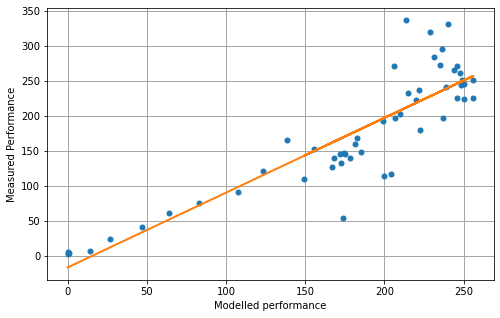

In [65]:
df_m = df_broad.resample('10min').mean()

k = np.polyfit(df_m['My_QDT_Power'],df_m['SVS_POWER_GT1GT3'],1)
p = np.poly1d(k)
print(k)

# Create figure and axis objects
fig, ax = plt.subplots(figsize=(8, 5))

# Create a scatterplot
ax.plot(
    df_m['My_QDT_Power'],
    df_m['SVS_POWER_GT1GT3'],
    marker="o",
    linestyle="",
    markersize=5,
)

ax.plot(df_m['My_QDT_Power'],p(df_m['My_QDT_Power']), linewidth=2)
ax.grid(axis='both',which='major',color=[166/255,166/255,166/255], linestyle='-', linewidth=1)
ax.grid(axis='both',which='minor',color='gray', linestyle='-', linewidth=1)

plt.xlabel('Modelled performance')
plt.ylabel('Measured Performance')

plt.show();

In [67]:
fig = px.line(df_m, x=df_m.index, y=['SVS_POWER_GT1GT3', 'SVS_QDT_calculated_power_per_m2', 
                                             'SVS_QDT_calculated_total_power','My_QDT_Power'],
              labels={'value':'Power'},
                title="Extracted Power")
fig.show()

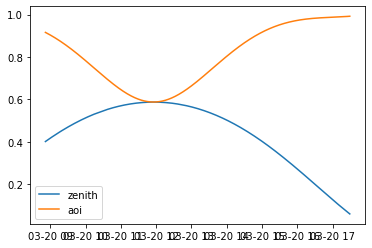

In [ ]:
df = df_broad
Kb_zenith = np.array([IAM_qdt(angle,'QDT-method') for angle in df_broad['zenith_angle']]) 
Kb_iam = np.array([IAM_qdt(angle,'QDT-method') for angle in df_broad['aoi']]) 

plt.plot(df.index,Kb_zenith,label='zenith')
plt.plot(df.index,Kb_iam,label='aoi')
plt.legend()

### Hur ser energiproduktion ut? 
- Vi bbehöver integrera under kurvan ovan

In [ ]:
import numpy as np
from scipy.integrate import simps
from numpy import trapz

# The y values.  A numpy array is used here,
# but a python list could also be used.
y = q_sqm

# Compute the area using the composite trapezoidal rule.
area = trapz(y, dx=5)
print("area =", area)

# Compute the area using the composite Simpson's rule.
area = simps(y, dx=10)
print("area =", area)

area = 5299832.480118055
area = 10599670.471390653


In [ ]:
def integrate(y_vals, h):
    i = 1
    total = y_vals[0] + y_vals[-1]
    for y in y_vals[1:-1]:
        if i % 2 == 0:
            total += 2 * y
        else:
            total += 4 * y
        i += 1
    return total * (h / 3.0)

y_values = [13, 45.3, 12, 1, 476, 0]
interval = 1
area = integrate(q_sqm, interval)
print("The area is", area)

The area is 1059987.0747818127


In [ ]:
from scipy.integrate import simpson

x = df_broad.index.to_numpy()
simpson(q_sqm,dx=1)

1059967.047139065

In [ ]:
1059967.047139065 0.1
10599.670471390653 0.01

SyntaxError: invalid syntax (Temp/ipykernel_7760/4202252901.py, line 1)

In [ ]:
from scipy import integrate
x = np.arange(0, 10)
y = np.arange(0, 10)

print(integrate.simpson(y, x))
print(integrate.simpson(y,dx=0.1))

#40.5

y = np.power(x, 3)


integrate.simpson(y, x)
#1642.5

40.5
4.05


1642.5

## Kikar lite extra på IAM

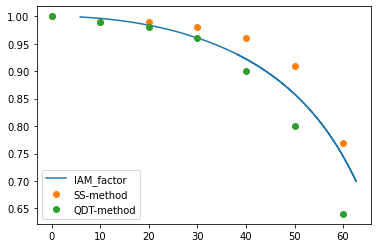

In [ ]:
plt.plot(df_broad['theta_angle'],df_broad['IAM_factor'],label='IAM_factor')
plt.plot(IAM_df.index[:7],IAM_df['SS-method'][:7],'o',label = 'SS-method')
plt.plot(IAM_df.index[:7],IAM_df['QDT-method'][:7],'o',label = 'QDT-method')

plt.legend()

Baserat på ovanstående graf, där vi ser att Dashboardens implementation av IAM-faktorn varken överensstämmer med QDT- eller SS- parametrarna, gissar jag på att ASHIRE (?)-modellen har använts. Vad är då $b_0$?

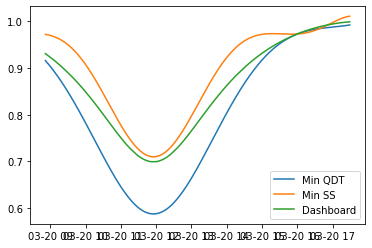

In [ ]:
#angle,'SS-method')


plt.plot(df_broad.index,[IAM_qdt(angle,'QDT-method') for angle in df_broad['theta_angle']],label='Min QDT')
plt.plot(df_broad.index,([IAM_qdt(angle,'SS-method') for angle in df['aoi']]) ,label='Min SS')

plt.plot(df_broad.index,df_broad['IAM_factor'],label='Dashboard')



plt.legend()



In [ ]:
IAM_df = pd.DataFrame({#'Angle':Angles,
                       'QDT-method':QDT_IAM,
                      'SS-method':SS_IAM}, index = Angles)

IAM_df.index[:7]

Int64Index([0, 10, 20, 30, 40, 50, 60], dtype='int64')

In [ ]:
# Testa "fixa till signal"

plt.plot(q_sqm, linewidth=2, c="b")  # it include some noise

plt.plot(df['SVS_QDT_calculated_power_per_m2'],'k')

import pandas as pd
df4 = pd.DataFrame(q_sqm, df.index)
df_mva = df4.rolling(100,center=True).mean()  # moving average with a window size of 30

plt.plot(df_mva,'r')

## Further exploration of GT1

In [ ]:
fig = px.line(df_broad, x=df_broad.index, y=['SVS-GT1:1_TEMPERATURE', 'SVS-GT1:2_TEMPERATURE',
       'SVS-GT1:3_TEMPERATURE', 'SVS-GT1:4_TEMPERATURE',
       'SVS-GT1:5_TEMPERATURE', 'SVS-GT1:6_TEMPERATURE',
       'SVS-GT1:7_TEMPERATURE', 'SVS-GT1:8_TEMPERATURE'],
              labels={"value":"Temperature",},
                title="GT1")
fig.show()

In [ ]:
fig = px.box(df, x=['SVS-GT1:1_TEMPERATURE', 'SVS-GT1:2_TEMPERATURE','SVS-GT1:3_TEMPERATURE', 'SVS-GT1:4_TEMPERATURE',
       'SVS-GT1:5_TEMPERATURE', 'SVS-GT1:6_TEMPERATURE',
       'SVS-GT1:7_TEMPERATURE', 'SVS-GT1:8_TEMPERATURE'],
            labels={'value':'Temperature','variable':'sensor'},#notched=True,
             title='Boxplot fpr temperatures of GT1',height=500)
fig.show()

# Mer informativ om dennz endast visar tider då energi levereras till nätverk.

In [ ]:
GT1_df = df[['SVS-GT1:1_TEMPERATURE', 'SVS-GT1:2_TEMPERATURE','SVS-GT1:3_TEMPERATURE', 'SVS-GT1:4_TEMPERATURE',
       'SVS-GT1:5_TEMPERATURE', 'SVS-GT1:6_TEMPERATURE', 'SVS-GT1:7_TEMPERATURE', 'SVS-GT1:8_TEMPERATURE']]


In [ ]:
def ftod(x):
    if (x<13):
        tod = 'morning'
    #elif (x>10) and (x<13):
    #    tod = 'early day'
    else:
        tod = 'afternoon'
    return tod

In [ ]:
#GT1_df['tod'] = 
#ftod(GT1_df.index.hour)
GT1_df_mod=GT1_df.copy()
GT1_df_mod['tod']= [ftod(hour) for hour in GT1_df.index.hour]


In [ ]:
import plotly.express as px

df = px.data.tips()

fig = px.box(GT1_df_mod,y=['SVS-GT1:1_TEMPERATURE', 'SVS-GT1:2_TEMPERATURE','SVS-GT1:3_TEMPERATURE', 'SVS-GT1:4_TEMPERATURE',
       'SVS-GT1:5_TEMPERATURE', 'SVS-GT1:6_TEMPERATURE',
       'SVS-GT1:7_TEMPERATURE', 'SVS-GT1:8_TEMPERATURE'], color="tod",
             title='Boxplot for temperatures of GT1',height=600,
            labels={'value':'Temperature', 'variable':'Temperature sensor', 'tod':'Time of Day'})

fig.update_traces(quartilemethod="exclusive") # or "inclusive", or "linear" by default
fig.show()

GT1_df_mod[['SVS-GT1:1_TEMPERATURE', 'SVS-GT1:2_TEMPERATURE','SVS-GT1:3_TEMPERATURE', 'SVS-GT1:4_TEMPERATURE',
       'SVS-GT1:5_TEMPERATURE', 'SVS-GT1:6_TEMPERATURE',
       'SVS-GT1:7_TEMPERATURE', 'SVS-GT1:8_TEMPERATURE']].mean()

In [ ]:
g = sns.PairGrid(GT1_df)
g.map_upper(sns.scatterplot)
g.map_lower(sns.kdeplot)
g.map_diag(sns.kdeplot, lw=3, legend=False)

In [ ]:
df_normalized=(GT1_df - GT1_df.mean()) / GT1_df.std()


df_normalized.cov()
# A high covariance basically indicates there is a strong relationship between the variables. A low value means there is a weak relationship.